In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.consignes{
  font-weight: bold;
  color: #3256a8;
  background-color: #edebdf
}
</style>
""")



# <div class=consignes>Deep Learning et traitement du signal TP 1 </div>
<div class=consignes> L'objectif de ce TP est de prendre en main les outils de modélisation et d'analyse du signal présentés dans le premier cours et d'introduire la problématique de <it>détection</it> dont on parlera dans le cours numéro 3 </div>
<div class=consignes>Deadline de rendu : 15 octobre 2025, 13h59, par mail à deepetsignal.mva@gmail.com <br> Effort estimé : 2 à 3 heures maximum</div>
<div class=consignes>Le rendu de ce TP n'est pas obligatoire. Il permet d'obtenir un bonus de 1 (minimum syndical) à 3 (votre notebook servira de correction l'an prochain) points sur la moyenne des TP </div>

<div class=consignes> Listez les noms des étudiants (2 au maximum) ayant participé à ce notebook dans la cellule suivante (prénom, nom).<br/>
Au moment du rendu, le notebook doit être nommé nom1_nom2_dlts_tp1.ipynb </div>

Léos Coutrot

Mathis Pernin

<div class=consignes>Si vous installez des paquets supplémentaires, merci de les lister dans la cellule suivante avec la syntaxe
    
```
!pip install \< nom_du_paquet \>
```
    
</div>

In [2]:
import numpy as np 
import matplotlib.pylab as plt 
import scipy
import IPython.display as ipd

## <div class=consignes>Partie 1: Audio </div>

### <div class=consignes>Visualisation</div>

 <div class=consignes>Enregistrez un fichier wav de quelques secondes de votre voix. 
  <br>
 Importez le avec scipy.io.wavfile.read et écoutez le dans le notebook avec IPython.display.Audio
</div>

In [3]:
# Import the file with scipy.io.wavfile.read
from scipy.io import wavfile

# Load the audio file
fs, audio = wavfile.read('ma_voix.wav')

# My audio is stereo, convert to mono
audio = np.mean(audio, axis=1).astype(np.int16)

In [4]:
print("=== Audio File ===")
print(f"Original sample rate: {fs}")
print(f"Audio data type: {audio.dtype}")
print(f"Audio shape: {audio.shape}")
print(f"Audio range: [{audio.min()}, {audio.max()}]")

=== Audio File ===
Original sample rate: 44100
Audio data type: int16
Audio shape: (555072,)
Audio range: [-12261, 12641]


In [5]:
# Listen to the audio
ipd.Audio(audio, rate=fs)

<div class=consignes>Visualisez la forme d'onde temporelle de ce signal audio. <br>
Estimez et affichez sa Densité Spectrale de Puissance. <br>
Donnez une interprétation de ce que vous observez. 
    </div>

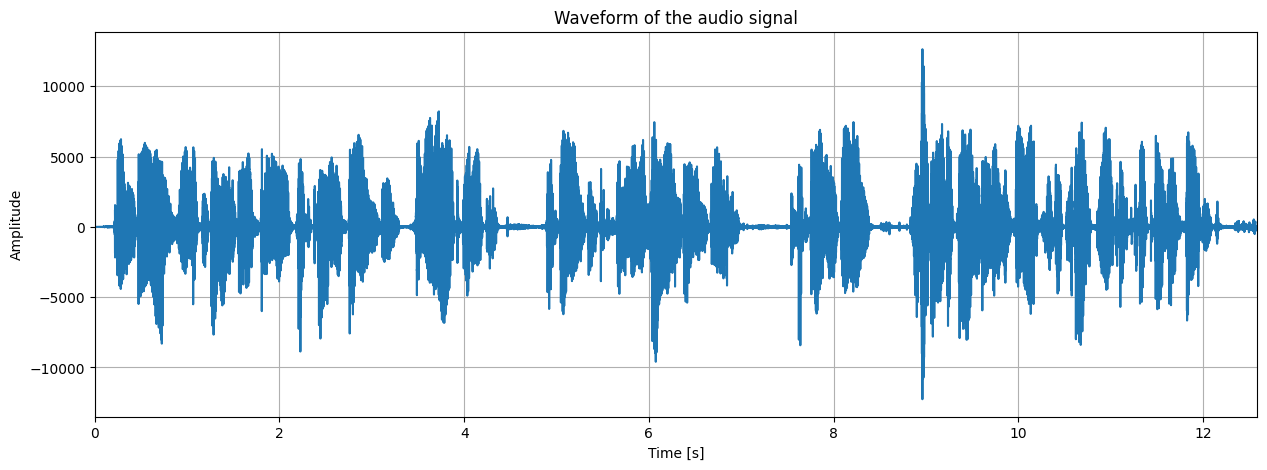

In [6]:
# Show the waveform
time = np.arange(len(audio)) / fs

plt.figure(figsize=(15, 5))
plt.plot(time, audio)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Waveform of the audio signal')
plt.xlim(0, time[-1])
plt.grid()

plt.show();

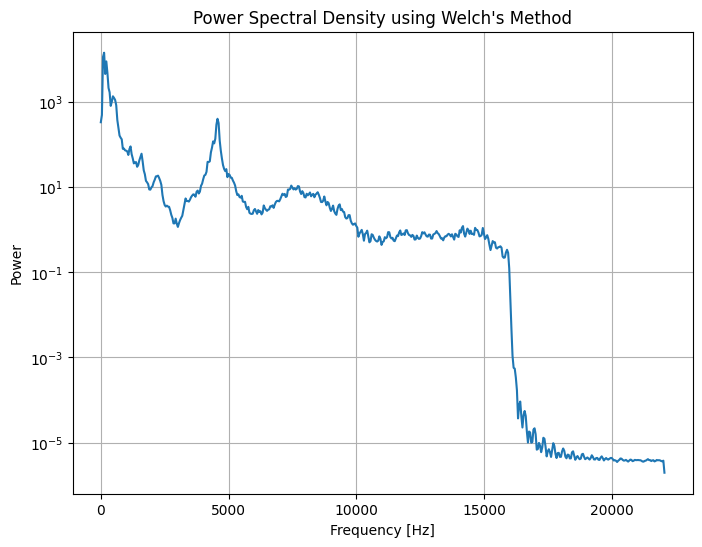

In [7]:
# Estimate the power spectral density using Welch's method
from scipy.signal import welch
frequencies, psd = welch(audio, fs, nperseg=1024)
plt.figure(figsize=(8, 6))
plt.semilogy(frequencies, psd)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')
plt.title('Power Spectral Density using Welch\'s Method')
plt.grid()
plt.show();

**Commentaire :** On observe une forte concentration d’énergie aux basses fréquences (0–500 Hz), ce qui est typique de la voix humaine : ces fréquences correspondent aux formants fondamentaux (fréquence fondamentale et premières harmoniques). Au-delà d’environ 8–10 kHz, la puissance décroît fortement, ce qui est également normal pour un signal vocal, puisque la majorité de l’énergie de la parole se situe en dessous de 8 kHz. L'énergie du signal vocal s'atténue ensuite fortement.

<div class=consignes> Calculez et affichez le spectrogramme du signal. <br>
Justifiez du choix des réglages que vous avez faits. <br>
Sélectionnez une portion pertinente du spectrogramme pour estimer visuellement le pitch de votre voix.
    </div>

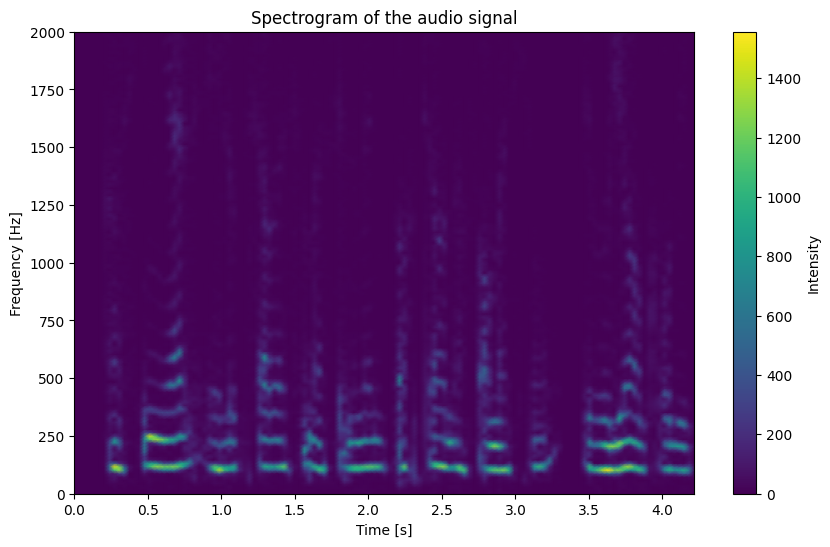

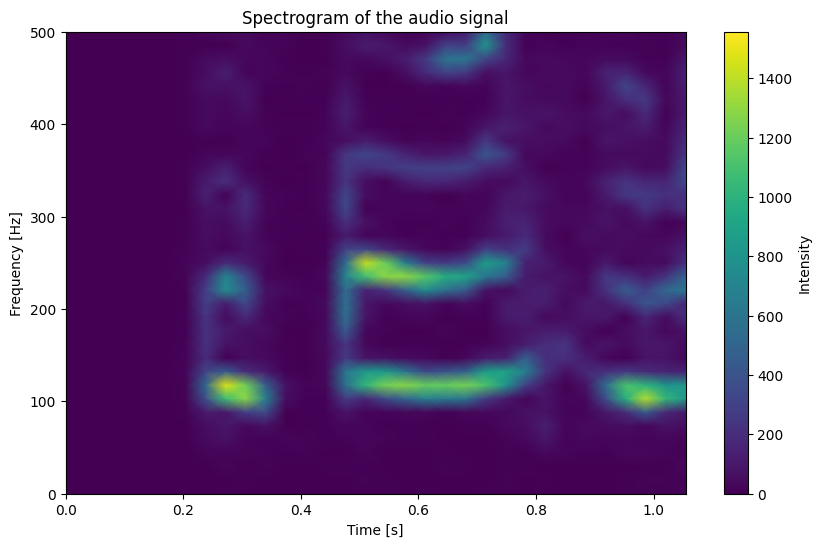

In [8]:
# Show the sprectrogram
from scipy.signal import stft

fe = fs
nperseg = 3000 #2205 # 0.05s per window
nfft = 3000 # 2205 
noverlap = nperseg // 2

frequencies, times, Zxx = stft(audio, fs, nperseg=nperseg, noverlap=noverlap, nfft=nfft, window='hamming')
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, np.abs(Zxx), shading='gouraud')
plt.colorbar(label='Intensity')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.xlim(0, times[len(times) // 3])
plt.ylim(0, 2000)
plt.title('Spectrogram of the audio signal')
plt.show();

plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, np.abs(Zxx), shading='gouraud')
plt.colorbar(label='Intensity')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.xlim(0, times[len(times) // 12])
plt.ylim(0, 500)
plt.title('Spectrogram of the audio signal')
plt.show();

**Commentaire :**

##### Justification des réglages
1. Résolution temporelle
Durée d’une fenêtre = 3000 échantillons / 44,1 kHz = 0,068 s ≈ 68 ms par fenêtre.
Pour la parole, une fenêtre d’environ 50–100 ms est adaptée : elle est suffisamment courte pour obtenir un signal quasi stationnaire (les caractéristiques du spectre ne changent pas trop pendant ce laps de temps), et suffisamment longue pour obtenir une résolution fréquentielle correcte.
2. Résolution fréquentielle
Résolution ≈ fs/nfft = 44100/3000 ≈ 14,7 Hz. Chaque écart fréquentiel représente un pas de ~15 Hz, ce qui permet de distinguer les harmoniques et les formants de la voix (espacés de 100–300 Hz).

##### Portion pertinente pour estimer le pitch
Pour estimer le pitch, on peut se concentrer sur le début du signal en regardant la plage de fréquences entre 80 Hz et 300 Hz, où se situe généralement la fréquence fondamentale de la voix humaine. En observant les pics dans cette plage, on peut estimer le pitch ici à environ 120 Hz.

### <div class=consignes>Calcul du Pitch</div>

<div class=consignes>Proposez une méthode simple pour estimer automatiquement le Pitch de votre voix (cette méthode ne doit pas faire intervenir d'implémentations externes).

Utilisez cette méthode pour estimer les variations du Pitch le long du signal, estimez le pitch toutes les 20 ms et présentez vos résultats sous forme visuelle. 

Ne pas utiliser de méthode "toute faite" que vous pourriez par exemple trouver dans la bibliothèque librosa.

Commentez vos résultats.
    </div>

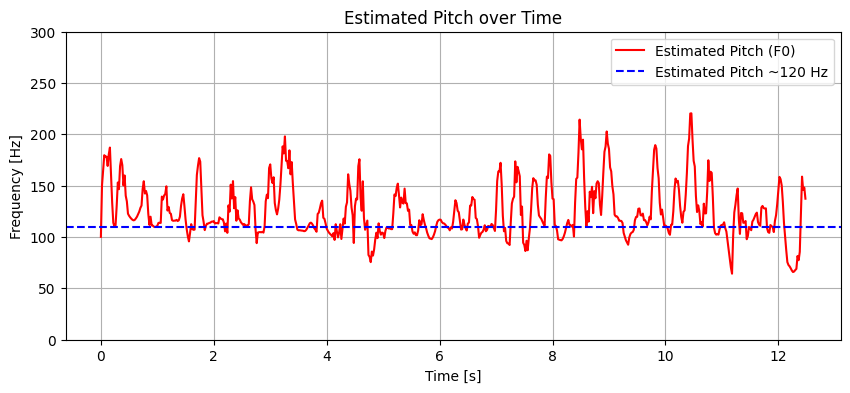

In [9]:
def estimate_pitch_simple(signal, sr, hop_ms=20, fmin=50, fmax=250):
    hop = int(sr * hop_ms / 1000)
    frame_len = hop               # fenêtre courte = 20 ms
    nframes = len(signal) // hop
    f0s = []

    lag_min = int(sr / fmax)
    lag_max = int(sr / fmin)

    for i in range(nframes):
        frame = signal[i*hop : i*hop + frame_len]
        if len(frame) < frame_len:
            break
        frame = frame - np.mean(frame)
        # autocorrélation
        ac = np.correlate(frame, frame, mode='full')
        ac = ac[len(ac)//2:]     # partie positive

        # chercher le maximum dans la plage [lag_min, lag_max]
        lag = np.argmax(ac[lag_min:lag_max]) + lag_min
        f0 = sr / lag if ac[lag] > 0 else 0
        f0s.append(f0)

    times = np.arange(len(f0s)) * hop / sr
    return times, np.array(f0s)

# calculer une moyenne mobile sur 100ms (5 mesures) pour lisser la courbe
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

times, f0s = estimate_pitch_simple(audio, fs)
f0s = moving_average(f0s, 5)
times = times[:len(f0s)]

plt.figure(figsize=(10, 4))
plt.plot(times, f0s, label='Estimated Pitch (F0)', color='red')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.title('Estimated Pitch over Time')
plt.ylim(0, 300)
plt.grid()
plt.legend()

# Afficher une droite horizontale à la fréquence du pitch estimé
plt.axhline(y=110, color='blue', linestyle='--', label='Estimated Pitch ~120 Hz')
plt.legend()

plt.show();


/home/l/Documents/MVA/DL_TS/coutrot_pernin_dlts-tp1 (2)/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


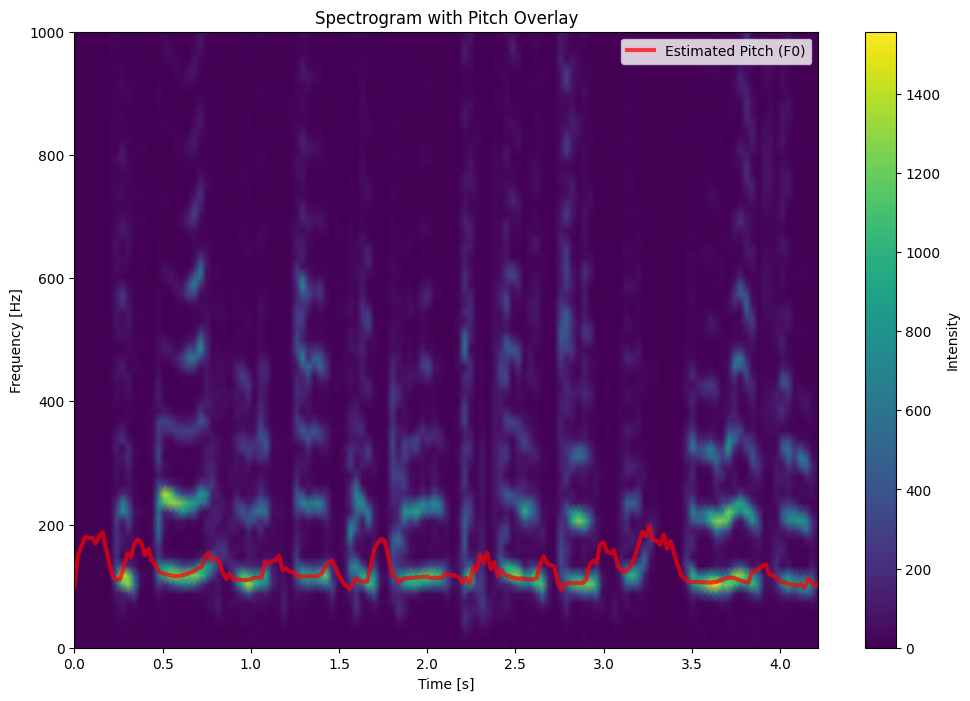

In [10]:
# superposer le spectrogramme et la courbe de pitch
frequencies, times_spec, Zxx = stft(audio, fs, nperseg=nperseg, noverlap=noverlap, nfft=nfft, window='hamming')

plt.figure(figsize=(12, 8))

plt.pcolormesh(times_spec, frequencies, np.abs(Zxx), shading='gouraud')
plt.colorbar(label='Intensity')
plt.plot(times, f0s, 'r-', linewidth=3, label='Estimated Pitch (F0)', alpha=0.7)

plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.xlim(0, times_spec[len(times_spec) // 3])
plt.ylim(0, 1000)
plt.title('Spectrogram with Pitch Overlay')
plt.legend()
plt.show()

**Commentaire :** 
Pour estimer le pitch manuellement, on a calculé pour chaque division d'environ 20ms l'autocorrélation du signal, puis identifié le pic le plus bas dans la plage de fréquences typique du pitch humain (50–300 Hz) comme la fréquence fondamentale. En effet l'autocorrélation est mesure la similarité d'un signal avec une version décalée de lui-même : ici le signal vocal est périodique donc l'autocorrélation présente des pics à des intervalles correspondant aux périodes du signal. En identifiant le premier pic significatif (après le pic à zéro délai), on peut déterminer la période fondamentale du signal, et donc son pitch.
En traçant ces valeurs de pitch estimées toutes les 20 ms (lissées par une moyenne mobile pour réduire le bruit), on peut visualiser les variations du pitch au fil du temps. On remarque que le pitch varie légèrement pendant la parole, ce qui semble refléter les intonations naturelles de la voix. Pendant les pauses, le pitch estimé est beaucoup plus haut, ce qui semble être dû au bruit interprété comme la fréquence fondamentale en l'absence de parole.

## <div class=consignes>Partie 2: Détection d'impulsion </div>

<div class=consignes> Un signal de durée 1 seconde et échantillonné à 1000 Hz est composé d'un bruit blanc gaussien de puissance inconnue et éventuellement d'une impulsion à une fréquence f0 comprise entre 100 et 200 Hz. 
<br><br>
Une série de 1000 signaux est enregistrée dans le fichier signaux_impulsions.npz. 
Ouvez ce fichier avec numpy (cf code plus bas). Le fichier contient une tableau signaux 10000 x 1000 dont chaque ligne contient un signal de durée 1000. Le fichiez contient aussi un tableau labels de taille 10000 dont la ligne i est à TRUE si le signal i contient une impulsion et à 0 sinon. 

</div>

In [11]:
donnees = np.load('signaux_impulsions.npz')
signaux = donnees['data']
labels = donnees['labels']

## <div class=consignes> Première méthode </div>

<div class=consignes> Proposez une méthode simple  pour décider si un signal contient une impulsion ou non à partir du calcul de l'énergie du signal. Cette méthode fera intervenir un seuil: 
</div>

```python
def contient_impulsion_energie(signal: np.ndarray, seuil: float) -> bool:
```

In [12]:
def contient_impulsion_energie(signal: np.ndarray, seuil: float) -> bool:
    return np.sum(signal ** 2) > seuil

<div class=consignes>
Utilisez votre méthode avec un seuil fixé sur tous les signaux pour prédire s'ils contiennent une impulsion ou non. 
</div>

<div class=consignes>
Calculez: <br>
- VP = le nombre de signaux que vous détectez comme contenant une impulsion qui contiennet effectivement une impulsion <br>
- FP = le nombre de signaux que vous détectez comme contenant une impulsion qui ne contiennet en fait PAS une impulsion <br>
- VN = le nombre de signaux que vous détectez comme ne contenant PAS une impulsion qui ne contiennet effectivement PAS une impulsion<br>
- FN = le nombre de signaux que vous détectez comme ne contenant PAS une impulsion mais qui  contiennet en fait une impulsion
</div>

In [13]:
seuil = 100
VP, FP, VN, FN = 0, 0, 0, 0

for i in range(len(signaux)):
    prediction = contient_impulsion_energie(signaux[i], seuil)
    label = labels[i]

    if prediction and label:
        VP += 1
    elif prediction and not label:
        FP += 1
    elif not prediction and not label:
        VN += 1
    elif not prediction and label:
        FN += 1

# Calcul des métriques
accuracy = (VP + VN) / (VP + VN + FP + FN)
precision = VP / (VP + FP) if (VP + FP) > 0 else 0
recall = VP / (VP + FN) if (VP + FN) > 0 else 0
F1score = 2 * (precision * recall) / (precision + recall)

# Affichage
print(f"Vrai Positifs (VP) : {VP}")
print(f"Faux Positifs (FP) : {FP}")
print(f"Vrai Négatifs (VN) : {VN}")
print(f"Faux Négatifs (FN) : {FN}")
print(f"Accuracy : {accuracy * 100:.2f}%")
print(f"Précision : {precision * 100:.2f}%")
print(f"Rappel : {recall * 100:.2f}%")
print(f"F1-score : {F1score * 100:.2f}%")

Vrai Positifs (VP) : 4629
Faux Positifs (FP) : 3227
Vrai Négatifs (VN) : 1769
Faux Négatifs (FN) : 375
Accuracy : 63.98%
Précision : 58.92%
Rappel : 92.51%
F1-score : 71.99%


## <div class=consignes>Deuxième méthode </div>

<div class=consignes>Proposez une deuxième méthode faisant par exemple intervenir le spectrogramme du signal. Cette méthode fera encore intervenir un seuil
</div>

```python
def contient_impulsion_spectrogramme(signal: np.ndarray, seuil: float) -> bool:
```


In [ ]:
def contient_impulsion_spectrogramme(signal: np.ndarray, seuil_dB: float) -> bool:
    f, t, Sxx = scipy.signal.spectrogram(signal, fs=1000, nperseg=128)

    # J'ai pris un facteur 10 pour la conversion. Les deux formules sont souvents présentées (avec un facteur 10 ou 20), et le facteur 10 me semblait plus approprié à notre contexte.
    Sxx_dB = 10 * np.log10(Sxx + 1e-12) # Conversion en dB  + offset pour éviter log(0)
    
    # On ne garde que les fréquences entre 100 et 200 Hz
    idx = np.where((f >= 100) & (f <= 200))[0]
    energie_bande = np.max(Sxx_dB[idx, :])
    
    return energie_bande > seuil_dB


<div class=consignes> Calculez pour cette nouvelle méthode, pour un certain seuil les valeurs de VP, FP, VN, FN </div>

In [15]:
seuil_spectrogramme = -21
VP, FP, VN, FN = 0, 0, 0, 0
for i in range(len(signaux)):
    prediction = contient_impulsion_spectrogramme(signaux[i], seuil_spectrogramme)
    label = labels[i]

    if prediction and label:
        VP += 1
    elif prediction and not label:
        FP += 1
    elif not prediction and not label:
        VN += 1
    elif not prediction and label:
        FN += 1

# Calcul des métriques
accuracy = (VP + VN) / (VP + VN + FP + FN)
precision = VP / (VP + FP) if (VP + FP) > 0 else 0
recall = VP / (VP + FN) if (VP + FN) > 0 else 0
F1score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Affichage
print(f"Vrai Positifs (VP) : {VP}")
print(f"Faux Positifs (FP) : {FP}")
print(f"Vrai Négatifs (VN) : {VN}")
print(f"Faux Négatifs (FN) : {FN}")
print(f"Accuracy (Spectrogramme) : {accuracy * 100:.2f}%")
print(f"Précision : {precision * 100:.2f}%")
print(f"Rappel : {recall * 100:.2f}%")
print(f"F1-score : {F1score * 100:.2f}%")

Vrai Positifs (VP) : 4365
Faux Positifs (FP) : 9
Vrai Négatifs (VN) : 4987
Faux Négatifs (FN) : 639
Accuracy (Spectrogramme) : 93.52%
Précision : 99.79%
Rappel : 87.23%
F1-score : 93.09%


## <div class=consignes> Comparaison des méthodes </sdivs>

<div class=consignes>Pour une méthode de détection et un seuil donné, la précision est définie comme: 

$$ 
\frac{\sharp\text{Signaux détectés comme contenant une impulsion qui en contiennent effectivement une}}{\sharp\text{Signaux détectés comme positifs }}
$$
et le rappel comme:
$$ 
\frac{\sharp\text{Signaux détectés comme contenant une impulsion qui en contiennent effectivement une}}{\sharp \text{Signaux contenant une impulsions}} $$
    
</div>

<div class=consignes> Donnez une interprétation de ces deux métriques </div>

**Precision** : Représente le pourcentage de signaux détectés comme contenant une impulsion et qui en contient effectivement une.

**Rappel** : Représente le pourcentage d’impulsions correctement détectées par rapport au nombre de signaux contenant des impulsions.

Nous avons pris la peine de rajouter le $F_1$-score, qui est définit comme suit :     

$$F_1\text{-score} = \frac{2 \times Precision \times Rappel}{Precision + Rappel}$$

On peut voir le $F_1$-score comme la moyenne harmonique entre la précision et le rappel. Il permet de donner une appréciation globale de la qualité du modèle et peut aider à trouver le seuil offrant le meilleur compromis entre rappel et précision.

En résumé : 
- La précision évite les fausses alarmes.
- Le rappel évite les oublis.
- Le F1-score équilibre les deux.

<div class=consignes>
    Pour chacune des deux méthodes proposées, faites varier le seuil sur une dizaine de valeurs et calculez la précision et le rappel pour chacun de ces seuils. 

Affichez dans le plan (précision , rappel) les points de fonctionnement des deux méthodes pour différents seuils. <br>Commentez le résultat. 
    </div>

In [16]:
def calculer_metriques(signaux, labels, method, seuils):
    precisions = []
    recalls = []
    accuracies = []
    f1scores = []
    for seuil in seuils:
        VP, FP, VN, FN = 0, 0, 0, 0

        for i in range(len(signaux)):
            prediction = method(signaux[i], seuil)
            label = labels[i]

            if prediction and label:
                VP += 1
            elif prediction and not label:
                FP += 1
            elif not prediction and not label:
                VN += 1
            elif not prediction and label:
                FN += 1

        precision = VP / (VP + FP) if (VP + FP) > 0 else 0
        recall = VP / (VP + FN) if (VP + FN) > 0 else 0
        accuracy = (VP + VN) / (VP + VN + FP + FN) if (VP + VN + FP + FN) > 0 else 0
        F1score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        precisions.append(precision)
        recalls.append(recall)
        accuracies.append(accuracy)
        f1scores.append(F1score)

    return precisions, recalls, accuracies, f1scores

def tracer_graphes(precisions, recalls, accuracies, F1score, seuils):
    plt.figure(figsize=(12, 6))

    # Courbe de la précision et du rappel
    plt.subplot(1, 4, 1)
    plt.plot(seuils, precisions, label='Précision', color='blue')
    plt.plot(seuils, recalls, label='Rappel', color='red')
    plt.xlabel('Seuil')
    plt.ylabel('Valeur')
    plt.legend()
    plt.title('Précision et Rappel en fonction du seuil')
    plt.grid(True)

    # Courbe d'accuracy
    plt.subplot(1, 4, 2)
    plt.plot(seuils, accuracies, label='Accuracy', color='green')
    plt.xlabel('Seuil')
    plt.ylabel('Accuracy')
    plt.title('Accuracy en fonction du seuil')
    plt.grid(True)

    # Courbe F1-score
    plt.subplot(1,4,4)
    plt.plot(seuils, F1score, label='F1-score', color='orange')
    plt.xlabel('Seuil')
    plt.ylabel('F1-score')
    plt.title('F1-score en fonction du seuil')
    plt.grid(True)

    # Courbe précision vs rappel
    plt.subplot(1, 4, 3)
    plt.plot(recalls, precisions, label='Précision vs Rappel', color='purple')
    plt.xlabel('Rappel')
    plt.ylabel('Précision')
    plt.title('Courbe Précision vs Rappel')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

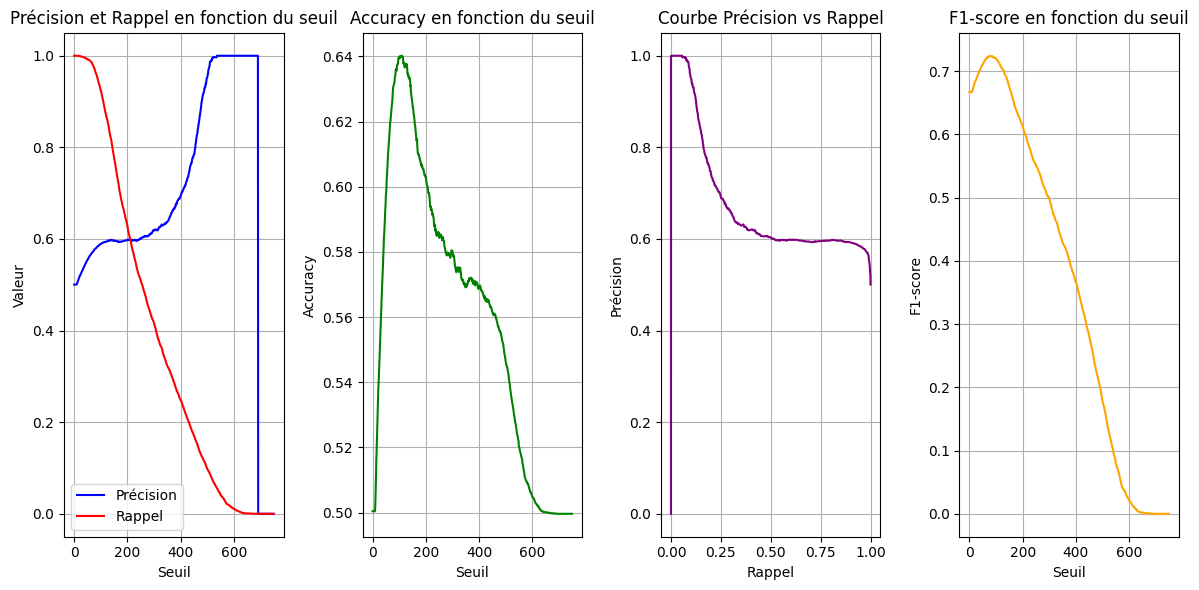

In [17]:
seuils = np.linspace(0, 750, 750)

precisions, recalls, accuracies, F1score = calculer_metriques(signaux, labels, contient_impulsion_energie, seuils)

tracer_graphes(precisions, recalls, accuracies, F1score, seuils)

In [18]:
idx = F1score.index(max(F1score)) # Extraction de l'indice de F1-score maximum
print(f"Seuil: {seuils[idx]:.2f}")
print(f"F1-score: {F1score[idx] * 100:.2f} %")
print(f"Précision: {precisions[idx] * 100:.2f} %")
print(f"Rappel: {recalls[idx]  * 100:.2f} %")
print(f"Accuracy: {accuracies[idx] * 100:.2f} %")

Seuil: 77.10
F1-score: 72.45 %
Précision: 57.77 %
Rappel: 97.12 %
Accuracy: 63.04 %


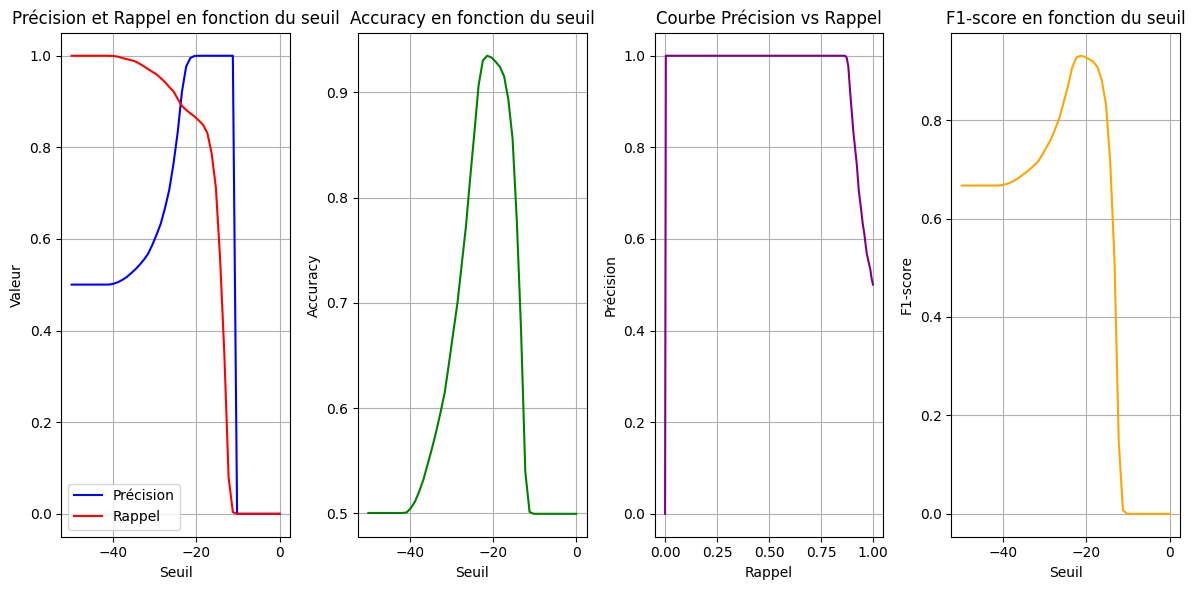

In [19]:
seuils = np.linspace(-50, 0, 50)

precisions, recalls, accuracies, F1score = calculer_metriques(signaux, labels, contient_impulsion_spectrogramme, seuils)

tracer_graphes(precisions, recalls, accuracies, F1score, seuils)

In [20]:
idx = F1score.index(max(F1score)) # Extraction de l'indice de F1-score maximum
print(f"Seuil: {seuils[idx]:.2f} dB")
print(f"F1-score: {F1score[idx] * 100:.2f} %")
print(f"Précision: {precisions[idx] * 100:.2f} %")
print(f"Rappel: {recalls[idx]  * 100:.2f} %")
print(f"Accuracy: {accuracies[idx] * 100:.2f} %")

Seuil: -21.43 dB
F1-score: 93.07 %
Précision: 99.52 %
Rappel: 87.41 %
Accuracy: 93.49 %


**Comparaison des métodes**

En testant différents seuils, nous avons identifié les valeurs optimales maximisant simultanément la précision et le rappel. Dans notre cas, nous nous sommes appuyés sur le $F_1$-score afin de déterminer le seuil offrant le meilleur compromis entre ces deux métriques.

**Méthode basée sur l’énergie** :

Avec un seuil à 77, nous obtenons un rappel de 97% et une précision de 57% ce qui nous donne un $F_1$-score de 72%. On remarque que pour améliorer la précision il faudrait fortement augmenter le seuil, ce qui réduirait le rappel. Ce seuil offre donc à priori le meilleur compromis entre précision et rappel. 

On observe sur le premier graphique (qui nous présente le rappel et la précision en fonction du seuil) une sorte de zone délicate entre 70 et 250 dans laquelle la précision baisse très fortement alors que le rappel stagne à environ 60%. Ainsi, si on veut absolument augmenter le rappel il faudra faire de très grandes concessions sur la précision.

**Méthode basée sur le spectrogramme** :

Les résultats obtenus avec cette méthode sont nettement supérieurs. En explorant une gamme de seuils entre -50 dB et 0 dB, les performances sont bien meilleures. Avec un seuil à -21 dB, nous atteignons par exemple une précision de 99% pour un rappel de 87% ce qui nous donne un $F_1$-score de 93%. Cette méthode s’avère plus adaptée, car l’analyse spectrale permet de mieux isoler les impulsions du bruit de fond, améliorant ainsi la fiabilité de la détection.

Les courbes de rappel et de précision varient de manière plus progressive et cohérente selon le seuil. Cela permet, en fonction des besoins, d’ajuster l’équilibre entre précision et rappel sans détériorer excessivement le $F_1$-score. Par exemple, dans un contexte où un rappel maximal est prioritaire, il serait possible d’accepter une légère baisse de précision tout en maintenant de bonnes performances globales.

**Conclusion**:

La méthode basée sur le spectrogramme surpasse clairement celle fondée sur l’énergie, offrant une meilleure robustesse et une plus grande adaptabilité aux variations de seuil. Elle constitue donc le choix le plus pertinent dans ce contexte.